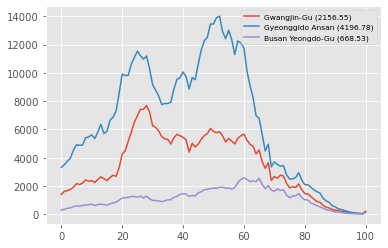

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
# 한글 폰트가 matplotlib에 출력이 안되는 관계로 영어로 지역이름을 썼습니다
df=pd.read_csv('/Users/19juhpark/Downloads/seoul_population_by_age.csv',header=0, index_col=0)
df2=pd.read_csv('/Users/19juhpark/Downloads/korea_population_by_age.csv',header=0,index_col=0)
gj=df.iloc[5:6,2:103]
gj.columns=list(range(0,101))


kr=df2.drop(['서울특별시  (1100000000)','부산광역시  (2600000000)','대구광역시  (2700000000)','인천광역시  (2800000000)',
            '광주광역시  (2900000000)','대전광역시  (3000000000)','울산광역시  (3100000000)','경기도  (4100000000)',
            '강원도  (4200000000)','충청북도  (4300000000)','충청남도  (4400000000)','전라북도  (4500000000)',
            '전라남도  (4600000000)','경상북도  (4700000000)','경상남도  (4800000000)','제주특별자치도  (5000000000)']).iloc[:,2:103]
kr.columns=list(range(0,101))
gjPop=[]
for i in gj:
    gjPop.append(gj[i].item())

    
foo=[]
diff=[0]*101;
index=-1;
for i in kr:
    foo =kr[i].to_numpy()
    index=index+1
    for j in range(len(foo)):
        diff[index]=diff[index]+(math.pow((int(gjPop[i].replace(',',''))-int(foo[j].replace(',',''))),2))
        
plt.style.use('ggplot')
for i in range(0, len(gjPop)):
    gjPop[i]=int(gjPop[i].replace(',',''))
    gjPop[i] = int(gjPop[i])

plt.plot(list(range(0,101)),gjPop,label='Gwangjin-Gu ({:.2f})'.format(np.std(gjPop)))
maxDiff=[]
bar=kr.iloc[diff.index(min(diff)):diff.index(min(diff))+1,0:101]

for i in bar:
    maxDiff.append(int(bar[i].item().replace(',','')))

plt.plot(list(range(0,101)),maxDiff, label='Gyeonggido Ansan ({:.2f})'.format(np.std(maxDiff)))

minDiff=[]
foobar=kr.iloc[diff.index(max(diff)):diff.index(max(diff))+1,0:101]

for i in foobar:
    minDiff.append(int(foobar[i].item().replace(',','')))

plt.plot(list(range(0,101)),minDiff,label='Busan Yeongdo-Gu ({:.2f})'.format(np.std(minDiff)))
plt.legend(loc = 'upper right',prop={'size': 7.5})
plt.show()
